In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from classes.FritidshusData import getFritidshusData, getFritidshusDataRaw, trainModel, testModel, saveModel, loadModel



In [2]:
data = getFritidshusData()
data.describe()

Cleaning
[{'name': 'Tag', 'uniques': ['Andet materiale', 'Betontagsten', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Levende tage', 'Metal', 'Plastmaterialer', 'Stråtag', 'Tagpap med lille hældning', 'Tagpap med stor hældning', 'Tegl']}, {'name': 'Ydervæg', 'uniques': ['Andet materiale', 'Betonelementer', 'Bindingsværk', 'Fibercement herunder asbest', 'Fibercement uden asbest', 'Glas', 'Letbetonsten', 'Mursten', 'Træ']}, {'name': 'Varmeinstallation', 'uniques': ['Centralvarme med én fyringsenhed', 'Elvarme', 'Fjernvarme blokvarme', 'Gasradiator', 'Ingen varmeinstallation', 'Ovn til fast og flydende brændsel', 'Varmepumpe']}]


,Adresse,Year build,Pris,Ejerudgift,Enhedsareal,Værelser,Antal toiletter,Antal badeværelser,Ydervæg,Tag,Seneste ombygning,Boligenhed med eget køkken,Varmeinstallation,Grundstørrelse,Ejendomsværdiskat,Grundskyld
count,3089.000000,3089.000000,3.089000e+03,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000,3089.000000
mean,6899.966332,1977.797022,1.373127e+06,1723.298478,83.452574,3.864034,1.179022,1.107802,7.574943,3.698608,661.528650,0.097766,1.746844,1239.905471,6428.899644,6962.451279
std,2163.180083,66.075204,6.420554e+05,615.018456,30.132916,1.083151,0.471328,0.464791,0.986125,3.141957,939.598241,0.297046,1.739889,360.782234,3140.702076,4320.316265
min,2750.000000,0.000000,1.980000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,501.000000,0.000000,0.000000
25%,4760.000000,1970.000000,8.500000e+05,1275.000000,63.000000,3.000000,1.000000,1.000000,8.000000,2.000000,0.000000,0.000000,1.000000,1000.000000,4100.000000,3864.000000
50%,6950.000000,1977.000000,1.250000e+06,1611.000000,79.000000,4.000000,1.000000,1.000000,8.000000,2.000000,0.000000,0.000000,1.000000,1207.000000,5880.000000,6158.000000
75%,9280.000000,1996.000000,1.760000e+06,2059.000000,100.000000,4.000000,1.000000,1.000000,8.000000,7.000000,1988.000000,0.000000,1.000000,1402.000000,8295.000000,9051.000000
max,9990.000000,2020.000000,2.998000e+06,5605.000000,264.000000,9.000000,4.000000,4.000000,8.000000,10.000000,2020.000000,1.000000,6.000000,2346.000000,20000.000000,39161.000000


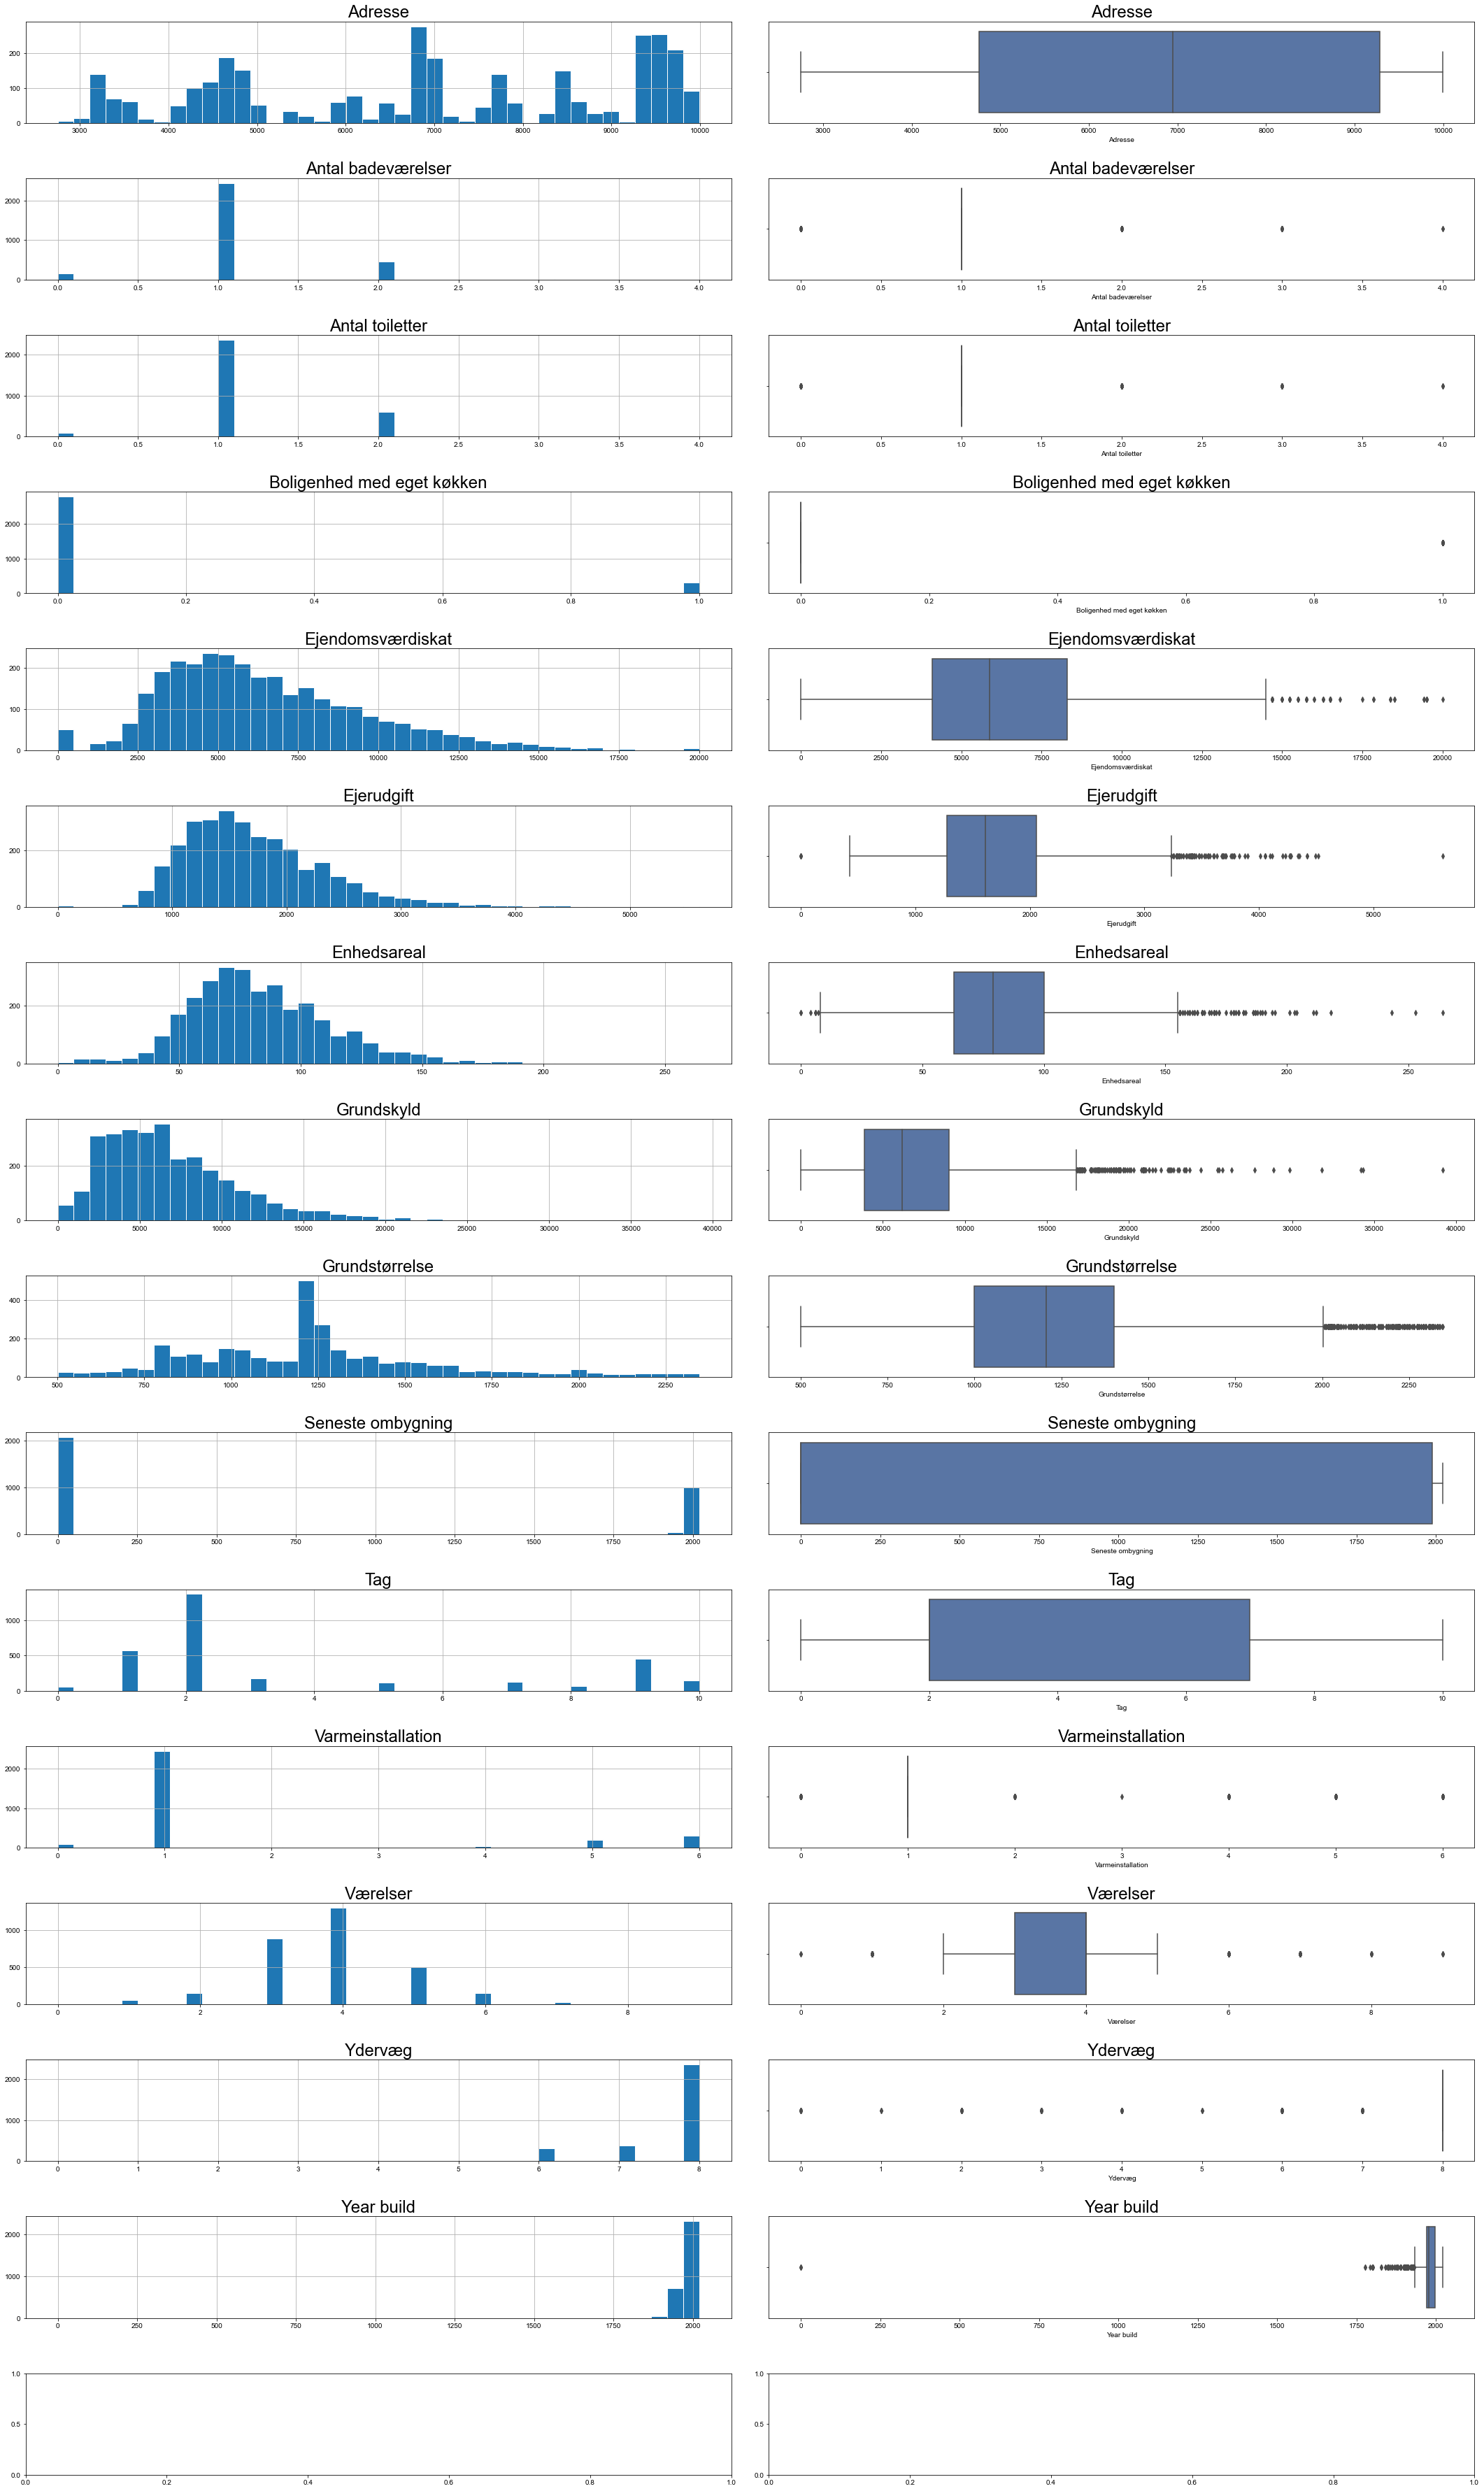

In [3]:
columns = np.setdiff1d(data.columns.to_numpy(),'Pris')
fig, axes = plt.subplots(nrows=16, ncols=2, figsize=(30,50))
sb.set(font_scale=2)

for col in enumerate(columns):
    data[col[1]].hist(ax=axes[col[0],0], bins=40);
    axes[col[0],0].set_title(col[1])
    sb.boxplot(ax=axes[col[0],1], x=data[col[1]])
    axes[col[0],1].set_title(col[1])

plt.tight_layout()

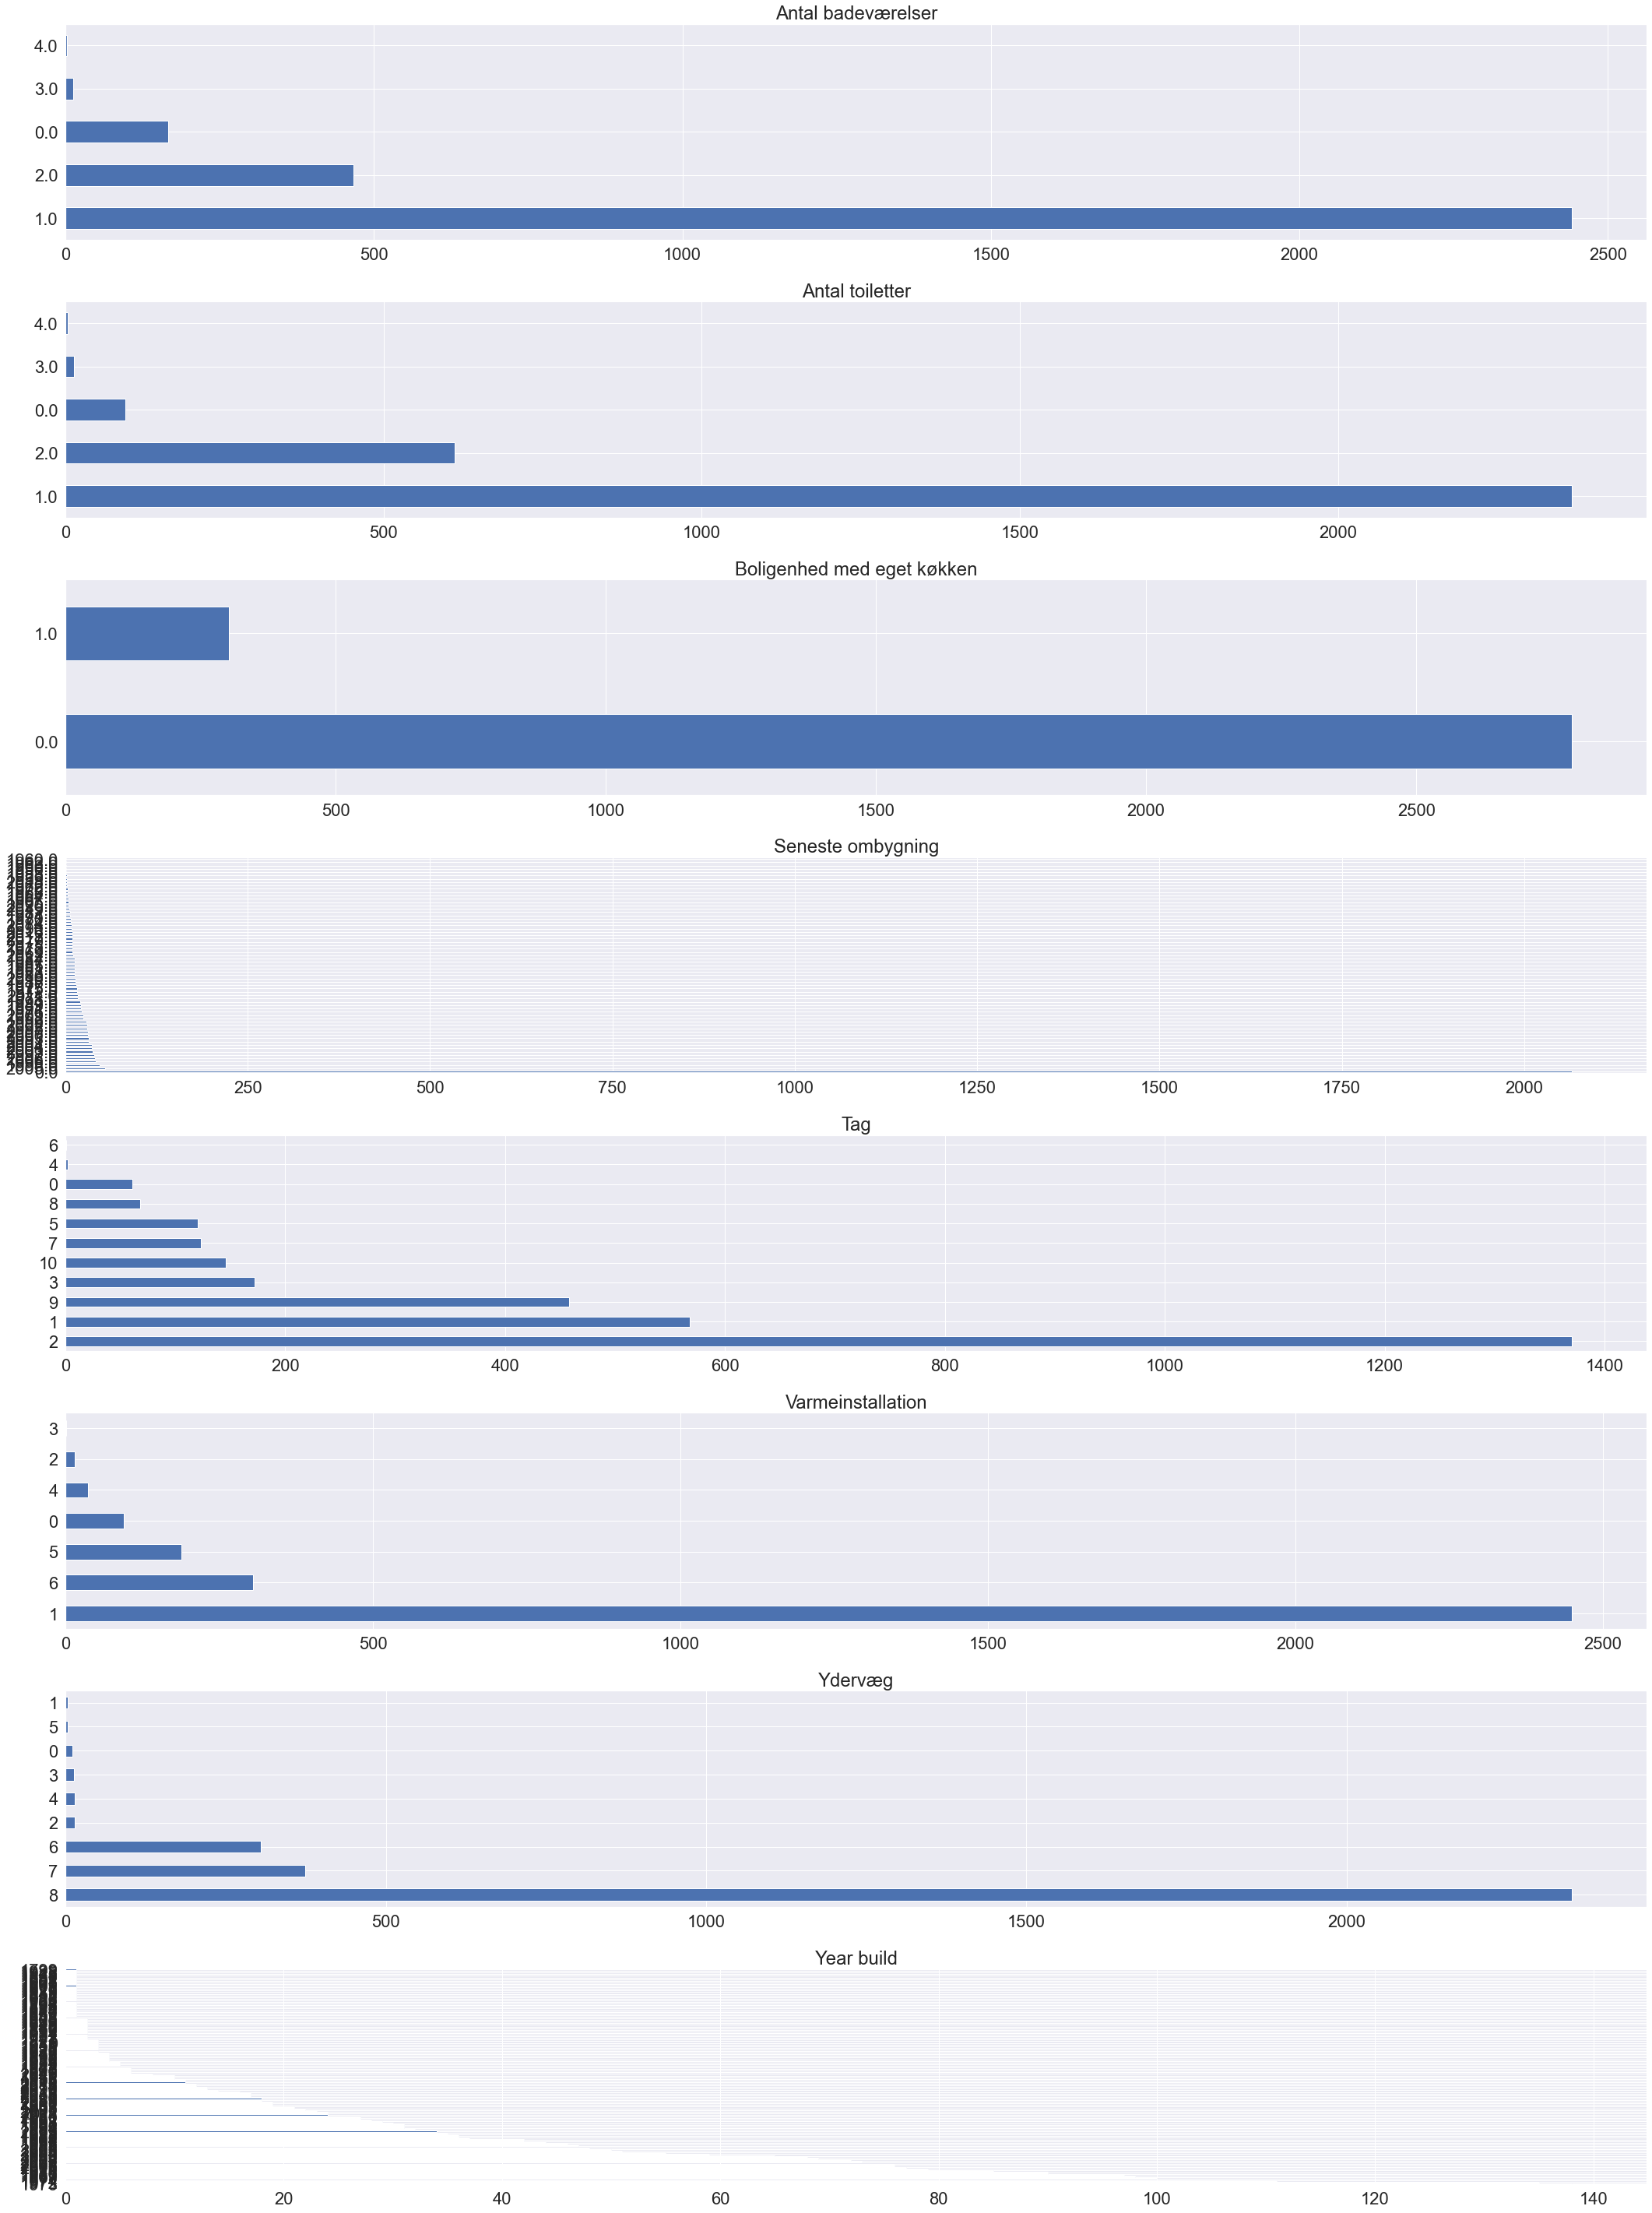

In [4]:
columns = ['Antal badeværelser', 'Antal toiletter', 'Boligenhed med eget køkken','Seneste ombygning', 'Tag', 'Varmeinstallation','Ydervæg','Year build']
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(30,40))
sb.set(font_scale=2)

for col in enumerate(columns):
    pd.value_counts(data[col[1]]).plot(kind='barh',ax=axes[col[0]])
    axes[col[0]].set_title(col[1]);
    
plt.tight_layout()

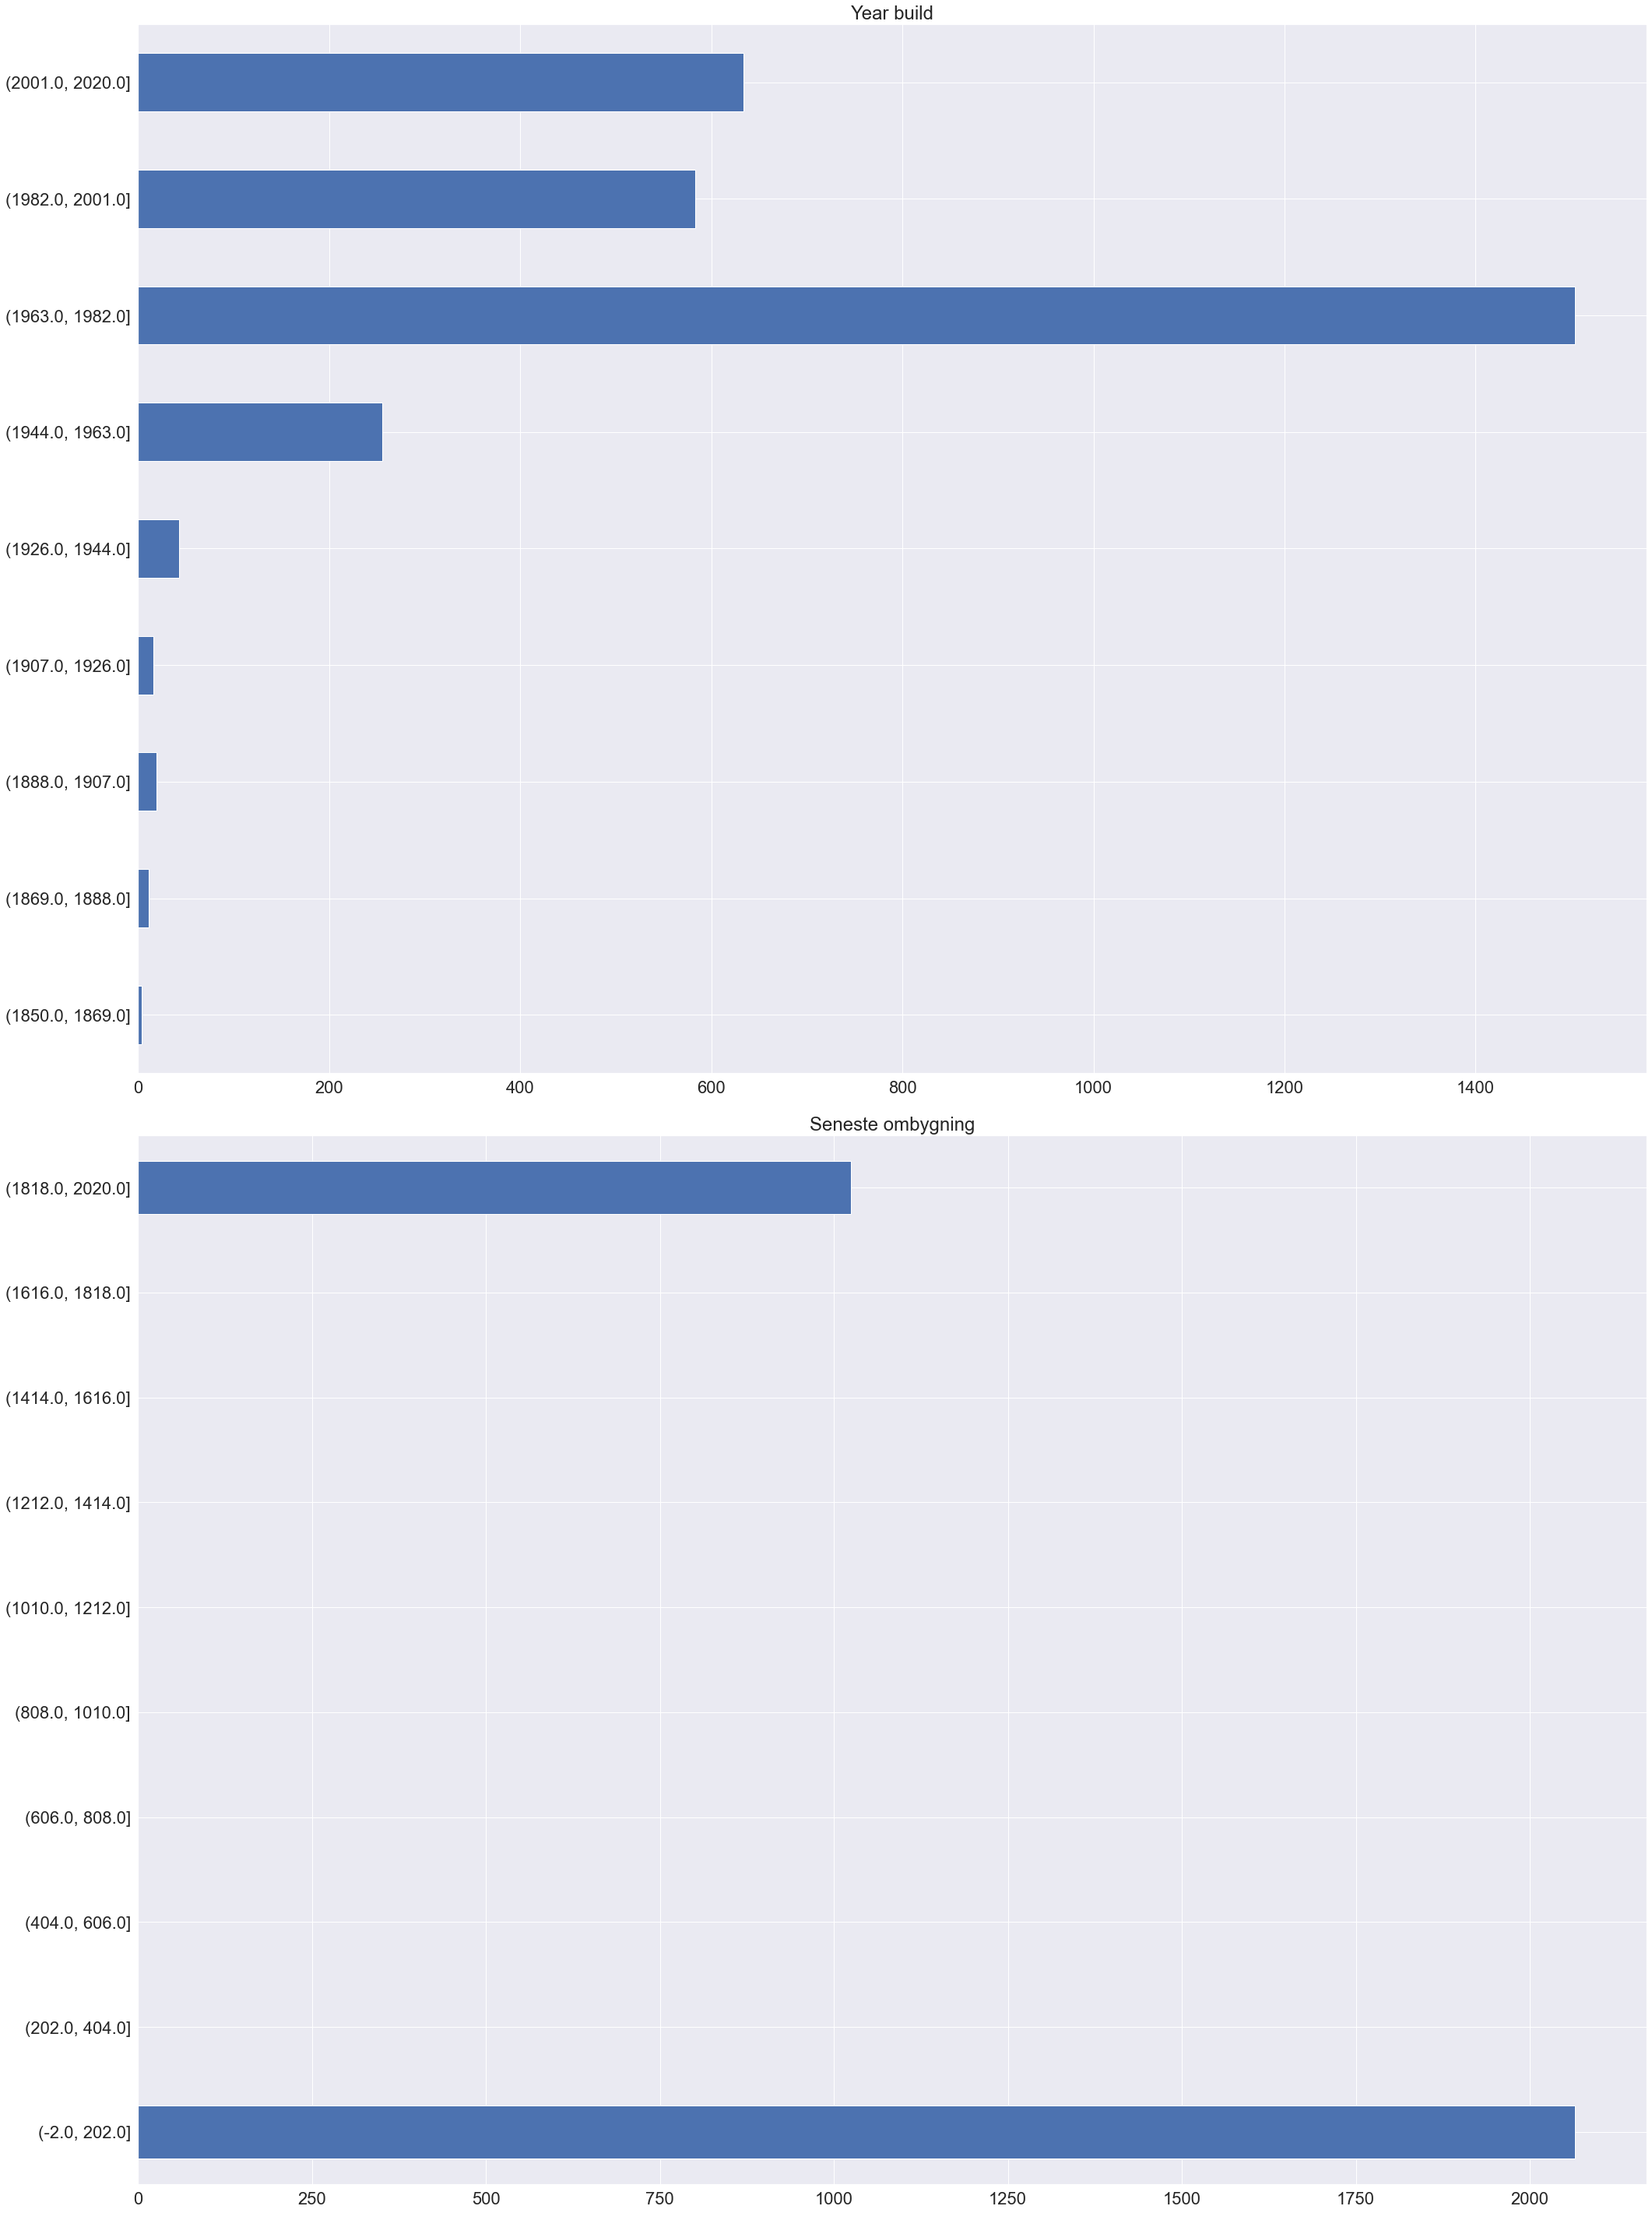

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(30,40))
sb.set(font_scale=2)

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Year build'], bins=bins, precision=0), sort=False).plot(kind='barh',ax=axes[0])
axes[0].set_title('Year build');

bins = np.linspace(1850, 2020, 10)
pd.value_counts(pd.cut(data['Seneste ombygning'], 10, precision=0), sort=False).plot(kind='barh',ax=axes[1])
axes[1].set_title('Seneste ombygning');



plt.tight_layout()

In [6]:
trainModel()

Data is already cleaned
Model trained


In [7]:
testModel()

0.6566927918207637

In [8]:
x,y=saveModel()

Model saved!
